In [1]:
import gc

import re

import pandas as pd
#import modin.pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from cycler import cycler

import multiprocessing as mp

from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
#unit_parser = np.vectorize(lambda x : Q_(x).to_base_units().magnitude)

In [2]:
cm = 1/2.54  # centimeters in inches

plt.rcParams['figure.figsize'] = [30.0, 16.0]
plt.rcParams['figure.dpi'] = 144

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

plt.style.use('seaborn-colorblind')
#plt.style.use('tableau-colorblind10')

colormap = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']
cycler_keys = plt.rcParams['axes.prop_cycle'].by_key()
cycler_keys['color'] = colormap
plt.rcParams['axes.prop_cycle'] = cycler(**cycler_keys)

plot_prefix = '../plots/'

In [3]:
def rfunc(x):
    return (10.71 * x - 20.83) / (x - 1.044)

def rfunc_norm(x):
    return rfunc(x )/ rfunc(1)

def toMbps(x):
    return x * (1400 + 55) * 8 / 10**6

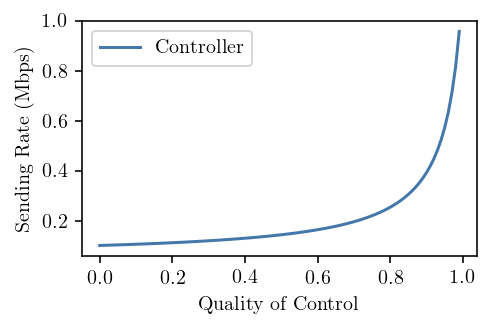

In [4]:

x = np.arange(0, 1, 0.01)
y = toMbps(100 * rfunc_norm(x))

data = pd.DataFrame(data=y, index=x, columns=["Controller"])

#display(data)

#fig, ax = plt.subplots(figsize=(8.5*cm,4.5*cm))
fig, ax = plt.subplots(figsize=(9.0*cm,5.5*cm))

ax.plot(data.index.values, data.values, label=data.columns.values[0])

handles, labels = ax.get_legend_handles_labels()
#labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0]), reverse=True))
#labels = np.vectorize(lambda x: '{0.magnitude:6.2f}{0.units:~}'.format((Q_(x) * ureg.second).to_compact()))(labels)

#legend = plot.legend(handles, labels, loc='center left', bbox_to_anchor= (1.01, 0.5))
#legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor= (1.01, 0.5))
legend = ax.legend(handles, labels)
#align_legend_labels(legend, ncol)

ax.set_xlabel('Quality of Control')
ax.set_ylabel('Sending Rate (Mbps)')

plt.savefig(plot_prefix + 'rfunc.pdf', bbox_inches='tight')
plt.show()